## Занятие 6
## Математический анализ
## Дифференцирование

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import sympy
from sympy import diff, solve, nsolve, solveset, latex, S, simplify, fraction
from sympy import sin as Sin
from sympy.calculus.util import continuous_domain
%matplotlib inline

## Лабораторная работа 6
## Математический анализ
## Задание 1
Исследовать функцию с помощью производной, найти необходимые пределы и решить уравнения.

Построить график функции и асимптот, отметить и подписать точки экстремума и точки перегиба,
включить функцию и асимптоты в легенду. 
$$
y = x^2e^{-x}
$$

In [ ]:
class graph:
  def __init__(this):
    this.ax = plt.gca()
  def normalize(this):
    this.ax.spines['right'].set_color('none')
    this.ax.spines['top'].set_color('none')
    this.ax.set_ylabel('y')
    this.ax.set_xlabel('x')
    dx = this.ax.get_xlim()[1] - this.ax.get_xlim()[0]
    dy = this.ax.get_ylim()[1] - this.ax.get_ylim()[0]

    if (this.ax.get_ylim()[0] > 0 and this.ax.get_ylim()[1] > 0):
      this.ax.spines['bottom'].set_position(('data', this.ax.get_ylim()[0]))
      this.ax.plot(1, this.ax.get_ylim()[0], ">k", transform=this.ax.get_yaxis_transform(), clip_on=False)
      this.ax.xaxis.set_label_coords(1, -1.25 * dy / 40 + this.ax.get_ylim()[0], transform=this.ax.get_yaxis_transform())
    elif (this.ax.get_ylim()[0] < 0 and this.ax.get_ylim()[1] < 0):
      this.ax.spines['bottom'].set_position(('data', this.ax.get_ylim()[1]))
      this.ax.plot(1, this.ax.get_ylim()[1], ">k", transform=this.ax.get_yaxis_transform(), clip_on=False)
      this.ax.xaxis.set_label_coords(1, -1.25 * dy / 40 + this.ax.get_ylim()[1], transform=this.ax.get_yaxis_transform())
    else:
      this.ax.spines['bottom'].set_position(('data', 0))
      this.ax.plot(1, 0, ">k", transform=this.ax.get_yaxis_transform(), clip_on=False)
      this.ax.xaxis.set_label_coords(1, -1.25 * dy / 40, transform=this.ax.get_yaxis_transform())

    if (this.ax.get_xlim()[0] > 0 and this.ax.get_xlim()[1] > 0):
      this.ax.spines['left'].set_position(('data', this.ax.get_xlim()[0]))
      this.ax.plot(this.ax.get_xlim()[0], 1, "^k", transform=this.ax.get_xaxis_transform(), clip_on=False)
      this.ax.yaxis.set_label_coords(0.15 * dx / 3 + this.ax.get_xlim()[0] + 0.075, 1, transform=this.ax.get_xaxis_transform())
    elif (this.ax.get_xlim()[0] < 0 and this.ax.get_xlim()[1] < 0):
      this.ax.spines['left'].set_position(('data', this.ax.get_xlim()[1]))
      this.ax.plot(this.ax.get_xlim()[1], 1, "^k", transform=this.ax.get_xaxis_transform(), clip_on=False)
      this.ax.yaxis.set_label_coords(0.15 * dx / 3 + this.ax.get_xlim()[1], 1, transform=this.ax.get_xaxis_transform())
    else:
      this.ax.spines['left'].set_position(('data', 0))
      this.ax.plot(0, 1, "^k", transform=this.ax.get_xaxis_transform(), clip_on=False)
      this.ax.yaxis.set_label_coords(0.15 * dx / 3, 1, transform=this.ax.get_xaxis_transform())

  def set_x(this, min, max, numpoints=1000):
    this.X = np.linspace(float(min + (max - min) / numpoints), float(max - (max - min) / numpoints), numpoints)

  def set_function(this, f):
    this.function = f

  def analyze_function(this, xmin = -100, xmax = 100):
    x = sympy.Symbol('x')
    y = sympy.Symbol('y')
    f = this.function
    #1. Область определения
    print("\033[95mОбласть определения: \033[0m")
    display(continuous_domain(f(x), x, S.Reals))
    #2. Четность
    print("\033[95mЧетность: \033[0m")
    if f(-x) == f(x):
      print('Четная функция')
    elif f(-x) == -f(x):
      print('Нечетная функция')
    else:
      print('Функция общего вида')
    #3. Периодичность
    print("\033[95mПериодичность: \033[0m")
    print("Функция не периодическая")
    #4. Точки пересечения с осями координат
    print("\033[95mТочки пересечения с осями координат: \033[0m")
    zero_points = [*solveset(f(x), domain=S.Reals)]
    if (not 0 in zero_points):
      zero_points.append(0)
    zero_points.sort()
    for point in zero_points:
      display((point, f(point)))
    #5. Точки экстремума
    print("\033[95mТочки экстремума: \033[0m")
    dif = diff(f(x))
    maxmin_points = [*solveset(dif, x, S.Reals)]
    maxmin_points.sort()
    for point in maxmin_points:
      display((point, f(point)))
    #6. Точки перегиба
    print("\033[95mТочки перегиба: \033[0m")
    dif2 = diff(f(x), x, 2)
    possible_inflection_points = [*solveset(dif2, domain=S.Reals)]
    possible_inflection_points.sort()
    inflection_points = []
    for point in possible_inflection_points:
      if (dif2.subs(x, point - 0.1) * dif2.subs(x, point + 0.1) < 0):
        inflection_points.append(point)
    for point in inflection_points:
      display((point, f(point)))
    #7. Асимптоты
    print("\033[95mАсимптоты: \033[0m")
    asymptots = []

    vertical = [*continuous_domain(f(x), x, S.Reals).symmetric_difference(S.Reals).boundary]
    for i in range(len(vertical)):
      asymptots.append((x, vertical))

    l_pos = sympy.limit(f(x), x, sympy.oo)
    if (l_pos != sympy.oo and l_pos != -sympy.oo):
      asymptots.append((y, l_pos))
    l_neg = sympy.limit(f(x), x, -sympy.oo)
    if (l_neg != sympy.oo and l_neg != -sympy.oo):
      asymptots.append((y, l_neg))

    kpos = sympy.limit(f(x)/x, x, +sympy.oo)
    kneg = sympy.limit(f(x)/x, x, -sympy.oo)
    if (kpos == kneg):
      b = sympy.limit(f(x) - kpos * x, x, sympy.oo)
      asymptots.append(y, kpos * x + b)
    else:
      if (kpos != sympy.oo and kpos != -sympy.oo):
        bpos = sympy.limit(f(x) - kpos * x, x, sympy.oo)
        if (bpos != sympy.oo and bpos != -sympy.oo):
          asymptots.append((y, kpos * x + bpos))
      if (kneg != sympy.oo and kneg != -sympy.oo):
        bneg = sympy.limit(f(x) - kneg * x, x, sympy.oo)
        if (bneg != sympy.oo and bneg != -sympy.oo):
          asymptots.append((y, kneg * x + bneg))
    tmp = asymptots
    asymptots = []
    for asymp in tmp:
      checker = True
      for asymp2 in asymptots:
        if (asymp[0] == asymp2[0] and asymp[1] == asymp2[1]):
          checker = False
          break
      if (checker):
        asymptots.append(asymp)
    display(asymptots)
    #8. График
    print("\033[95mГрафик: \033[0m")
    build_in = [*sympy.Intersection(continuous_domain(f(x), x, S.Reals), sympy.Interval(xmin, xmax)).boundary]
    for i in range(1, len(build_in)):
      this.set_x(float(build_in[i - 1]), float(build_in[i]))
      if (i == 1):
        this.ax.plot(this.X, f(this.X), color='blue', label=f"""$y={sympy.latex(f(x))}$""")
      else:
        this.ax.plot(this.X, f(this.X), color='blue')
    this.set_x(xmin, xmax)
    for asymp in asymptots:
      if (asymp[0] == x):
        this.ax.axvline(x=asymp[1], label=f"""Асимптота. x={asymp[1]}""", linestyle='dashed', color="red")
      else: 
        this.ax.plot(this.X, [asymp[1].subs(x, this.X[i]) for i in range(len(this.X))], label=f"""$Асимптота. y={sympy.latex(asymp[1])}$""", linestyle='dashed', color='red')
    
    x_coords = []
    y_coords = []
    for point in maxmin_points:
      x_coords.append(point)
      y_coords.append(f(point))
    for point in inflection_points:
      x_coords.append(point)
      y_coords.append(f(point))
    this.ax.scatter(x_coords, y_coords)
    for i, point in enumerate(maxmin_points):
      this.ax.annotate(f"""M{str(i + 1)}""", xy=(point, f(point)), xycoords='data', xytext=(point + 0.25, f(point) + 0.5), textcoords='data', arrowprops=dict(arrowstyle="->", connectionstyle="arc3"))
    for i, point in enumerate(inflection_points):
      this.ax.annotate(f"""I{str(i + 1)}""", xy=(point, f(point)), xycoords='data', xytext=(point + 0.25, f(point) + 0.5), textcoords='data', arrowprops=dict(arrowstyle="->", connectionstyle="arc3"))

    this.ax.legend(loc='best')

Область определения: 


Reals

Четность: 
Функция общего вида
Периодичность: 
Функция не периодическая
Точки пересечения с осями координат: 


(0, 0)

Точки экстремума: 


(0, 0)

(2, 4*exp(-2))

Точки перегиба: 


(2 - sqrt(2), (2 - sqrt(2))**2*exp(-2 + sqrt(2)))

(sqrt(2) + 2, (sqrt(2) + 2)**2*exp(-2 - sqrt(2)))

Асимптоты: 


[(y, 0)]

График: 


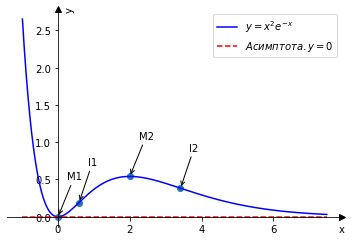

In [ ]:
def f(x):
  return((x ** 2) * sympy.E ** (-x))

picture = graph()

picture.set_function(f)
picture.analyze_function(-1, 7.5)

picture.normalize()

## Задание 2
Исследовать функцию с помощью производной, найти необходимые пределы и решить уравнения.

Построить график функции и асимптот, отметить и подписать точки экстремума и точки перегиба,
включить функцию и асимптоты в легенду. 
$$
y=xe^{2/x} + 1 
$$

In [ ]:
class graph:
  def __init__(this):
    this.ax = plt.gca()
  def normalize(this):
    this.ax.spines['right'].set_color('none')
    this.ax.spines['top'].set_color('none')
    this.ax.set_ylabel('y')
    this.ax.set_xlabel('x')
    dx = this.ax.get_xlim()[1] - this.ax.get_xlim()[0]
    dy = this.ax.get_ylim()[1] - this.ax.get_ylim()[0]

    if (this.ax.get_ylim()[0] > 0 and this.ax.get_ylim()[1] > 0):
      this.ax.spines['bottom'].set_position(('data', this.ax.get_ylim()[0]))
      this.ax.plot(1, this.ax.get_ylim()[0], ">k", transform=this.ax.get_yaxis_transform(), clip_on=False)
      this.ax.xaxis.set_label_coords(1, -1.25 * dy / 40 + this.ax.get_ylim()[0], transform=this.ax.get_yaxis_transform())
    elif (this.ax.get_ylim()[0] < 0 and this.ax.get_ylim()[1] < 0):
      this.ax.spines['bottom'].set_position(('data', this.ax.get_ylim()[1]))
      this.ax.plot(1, this.ax.get_ylim()[1], ">k", transform=this.ax.get_yaxis_transform(), clip_on=False)
      this.ax.xaxis.set_label_coords(1, -1.25 * dy / 40 + this.ax.get_ylim()[1], transform=this.ax.get_yaxis_transform())
    else:
      this.ax.spines['bottom'].set_position(('data', 0))
      this.ax.plot(1, 0, ">k", transform=this.ax.get_yaxis_transform(), clip_on=False)
      this.ax.xaxis.set_label_coords(1, -1.25 * dy / 40, transform=this.ax.get_yaxis_transform())

    if (this.ax.get_xlim()[0] > 0 and this.ax.get_xlim()[1] > 0):
      this.ax.spines['left'].set_position(('data', this.ax.get_xlim()[0]))
      this.ax.plot(this.ax.get_xlim()[0], 1, "^k", transform=this.ax.get_xaxis_transform(), clip_on=False)
      this.ax.yaxis.set_label_coords(0.15 * dx / 3 + this.ax.get_xlim()[0] + 0.075, 1, transform=this.ax.get_xaxis_transform())
    elif (this.ax.get_xlim()[0] < 0 and this.ax.get_xlim()[1] < 0):
      this.ax.spines['left'].set_position(('data', this.ax.get_xlim()[1]))
      this.ax.plot(this.ax.get_xlim()[1], 1, "^k", transform=this.ax.get_xaxis_transform(), clip_on=False)
      this.ax.yaxis.set_label_coords(0.15 * dx / 3 + this.ax.get_xlim()[1], 1, transform=this.ax.get_xaxis_transform())
    else:
      this.ax.spines['left'].set_position(('data', 0))
      this.ax.plot(0, 1, "^k", transform=this.ax.get_xaxis_transform(), clip_on=False)
      this.ax.yaxis.set_label_coords(0.15 * dx / 3, 1, transform=this.ax.get_xaxis_transform())


  def set_x(this, min, max, numpoints=1000):
    this.X = np.linspace(float(min + (max - min) / numpoints), float(max - (max - min) / numpoints), numpoints)

  def set_function(this, f):
    this.function = f

  def analyze_function(this, xmin = -100, xmax = 100, ymin = -5, ymax = 15):
    x = sympy.Symbol('x')
    y = sympy.Symbol('y')
    f = this.function
    #1. Область определения
    print("\033[95mОбласть определения: \033[0m")
    display(continuous_domain(f(x), x, S.Reals))
    #2. Четность
    print("\033[95mЧетность: \033[0m")
    if f(-x) == f(x):
      print('Четная функция')
    elif f(-x) == -f(x):
      print('Нечетная функция')
    else:
      print('Функция общего вида')
    #3. Периодичность
    print("\033[95mПериодичность: \033[0m")
    print("Функция не периодическая")
    #4. Точки пересечения с осями координат
    print("\033[95mТочки пересечения с осями координат: \033[0m")
    zero_points = [nsolve(f(x), x, -2)]
    zero_points.sort()
    for point in zero_points:
      display((point, f(point)))
    #5. Точки экстремума
    print("\033[95mТочки экстремума: \033[0m")
    dif = diff(f(x))
    maxmin_points = [nsolve(dif, x, 2)]
    maxmin_points.sort()
    for point in maxmin_points:
      display((point, f(point)))
    #6. Точки перегиба
    print("\033[95mТочки перегиба: \033[0m")
    dif2 = diff(f(x), x, 2)
    possible_inflection_points = [*solveset(dif2, domain=S.Reals)]
    possible_inflection_points.sort()
    inflection_points = []
    for point in possible_inflection_points:
      if (dif2.subs(x, point - 0.1) * dif2.subs(x, point + 0.1) < 0):
        inflection_points.append(point)
    for point in inflection_points:
      display((point, f(point)))
    #7. Асимптоты
    print("\033[95mАсимптоты: \033[0m")
    asymptots = []

    vertical = [*continuous_domain(f(x), x, S.Reals).symmetric_difference(S.Reals).boundary]
    for i in range(len(vertical)):
      asymptots.append((x, vertical[i]))

    l_pos = sympy.limit(f(x), x, sympy.oo)
    if (l_pos != sympy.oo and l_pos != -sympy.oo):
      asymptots.append((y, l_pos))
    l_neg = sympy.limit(f(x), x, -sympy.oo)
    if (l_neg != sympy.oo and l_neg != -sympy.oo):
      asymptots.append((y, l_neg))

    kpos = sympy.limit(f(x)/x, x, +sympy.oo)
    kneg = sympy.limit(f(x)/x, x, -sympy.oo)
    if (kpos == kneg):
      b = sympy.limit(f(x) - kpos * x, x, sympy.oo)
      asymptots.append((y, kpos * x + b))
    else:
      if (kpos != sympy.oo and kpos != -sympy.oo):
        bpos = sympy.limit(f(x) - kpos * x, x, sympy.oo)
        if (bpos != sympy.oo and bpos != -sympy.oo):
          asymptots.append((y, kpos * x + bpos))
      if (kneg != sympy.oo and kneg != -sympy.oo):
        bneg = sympy.limit(f(x) - kneg * x, x, sympy.oo)
        if (bneg != sympy.oo and bneg != -sympy.oo):
          asymptots.append((y, kneg * x + bneg))
    tmp = asymptots
    asymptots = []
    for asymp in tmp:
      checker = True
      for asymp2 in asymptots:
        if (asymp[0] == asymp2[0] and asymp[1] == asymp2[1]):
          checker = False
          break
      if (checker):
        asymptots.append(asymp)
    display(asymptots)
    #8. График
    print("\033[95mГрафик: \033[0m")
    build_in = [*sympy.Intersection(continuous_domain(f(x), x, S.Reals), sympy.Interval(xmin, xmax)).boundary]
    for i in range(1, len(build_in)):
      this.set_x(float(build_in[i - 1]), float(build_in[i]))
      if (i == 1):
        this.ax.plot(this.X, f(this.X), color='blue', label=f"""$y={sympy.latex(f(x))}$""")
      else:
        this.ax.plot(this.X, f(this.X), color='blue')
    this.set_x(xmin, xmax)
    for asymp in asymptots:
      if (asymp[0] == x):
        this.ax.axvline(x=asymp[1], label=f"""Асимптота. x={asymp[1]}""", linestyle='dashed', color="red")
      else: 
        this.ax.plot(this.X, [asymp[1].subs(x, this.X[i]) for i in range(len(this.X))], label=f"""$Асимптота. y={sympy.latex(asymp[1])}$""", linestyle='dashed', color='red')
    
    x_coords = []
    y_coords = []
    for point in maxmin_points:
      x_coords.append(point)
      y_coords.append(f(point))
    for point in inflection_points:
      x_coords.append(point)
      y_coords.append(f(point))
    this.ax.scatter(x_coords, y_coords)
    for i, point in enumerate(maxmin_points):
      this.ax.annotate(f"""M{str(i + 1)}""", xy=(point, f(point)), xycoords='data', xytext=(point + 1.25, f(point) + 1.5), textcoords='data', arrowprops=dict(arrowstyle="->", connectionstyle="arc3"))
    for i, point in enumerate(inflection_points):
      this.ax.annotate(f"""I{str(i + 1)}""", xy=(point, f(point)), xycoords='data', xytext=(point + 1.25, f(point) + 1.5), textcoords='data', arrowprops=dict(arrowstyle="->", connectionstyle="arc3"))

    this.ax.legend(loc='best')
    this.ax.set(ylim=(ymin, ymax))

Область определения: 


Union(Interval.open(-oo, 0), Interval.open(0, oo))

Четность: 
Функция общего вида
Периодичность: 
Функция не периодическая
Точки пересечения с осями координат: 


(-2.34575075492277, 1.11022302462516e-16)

Точки экстремума: 


(2.00000000000000, 6.43656365691809)

Точки перегиба: 
Асимптоты: 


[(x, 0), (y, x + 3)]

График: 


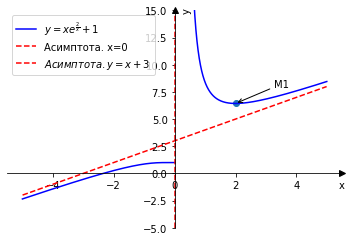

In [ ]:
def f(x):
  return(x * sympy.E ** (2 / x) + 1)

picture = graph()

picture.set_function(f)
picture.analyze_function(-5, 5, -5, 15)

picture.normalize()

## Индивидуальное задание
Исследовать функцию с помощью производной, найти необходимые пределы и решить уравнения.

Построить график функции и асимптот (если есть), отметить и подписать точки экстремума и точки перегиба (если есть),
включить функцию и асимптоты (если есть) в легенду. 


 Вариант 2

$f(x) = \left(5 x + 1\right) e^{\frac{3}{x}} + 2$

In [ ]:
class graph:
  def __init__(this):
    this.ax = plt.gca()
  def normalize(this):
    this.ax.spines['right'].set_color('none')
    this.ax.spines['top'].set_color('none')
    this.ax.set_ylabel('y')
    this.ax.set_xlabel('x')
    dx = this.ax.get_xlim()[1] - this.ax.get_xlim()[0]
    dy = this.ax.get_ylim()[1] - this.ax.get_ylim()[0]

    if (this.ax.get_ylim()[0] > 0 and this.ax.get_ylim()[1] > 0):
      this.ax.spines['bottom'].set_position(('data', this.ax.get_ylim()[0]))
      this.ax.plot(1, this.ax.get_ylim()[0], ">k", transform=this.ax.get_yaxis_transform(), clip_on=False)
      this.ax.xaxis.set_label_coords(1, -1.25 * dy / 40 + this.ax.get_ylim()[0], transform=this.ax.get_yaxis_transform())
    elif (this.ax.get_ylim()[0] < 0 and this.ax.get_ylim()[1] < 0):
      this.ax.spines['bottom'].set_position(('data', this.ax.get_ylim()[1]))
      this.ax.plot(1, this.ax.get_ylim()[1], ">k", transform=this.ax.get_yaxis_transform(), clip_on=False)
      this.ax.xaxis.set_label_coords(1, -1.25 * dy / 40 + this.ax.get_ylim()[1], transform=this.ax.get_yaxis_transform())
    else:
      this.ax.spines['bottom'].set_position(('data', 0))
      this.ax.plot(1, 0, ">k", transform=this.ax.get_yaxis_transform(), clip_on=False)
      this.ax.xaxis.set_label_coords(1, -1.25 * dy / 40, transform=this.ax.get_yaxis_transform())

    if (this.ax.get_xlim()[0] > 0 and this.ax.get_xlim()[1] > 0):
      this.ax.spines['left'].set_position(('data', this.ax.get_xlim()[0]))
      this.ax.plot(this.ax.get_xlim()[0], 1, "^k", transform=this.ax.get_xaxis_transform(), clip_on=False)
      this.ax.yaxis.set_label_coords(0.15 * dx / 3 + this.ax.get_xlim()[0] + 0.075, 1, transform=this.ax.get_xaxis_transform())
    elif (this.ax.get_xlim()[0] < 0 and this.ax.get_xlim()[1] < 0):
      this.ax.spines['left'].set_position(('data', this.ax.get_xlim()[1]))
      this.ax.plot(this.ax.get_xlim()[1], 1, "^k", transform=this.ax.get_xaxis_transform(), clip_on=False)
      this.ax.yaxis.set_label_coords(0.15 * dx / 3 + this.ax.get_xlim()[1], 1, transform=this.ax.get_xaxis_transform())
    else:
      this.ax.spines['left'].set_position(('data', 0))
      this.ax.plot(0, 1, "^k", transform=this.ax.get_xaxis_transform(), clip_on=False)
      this.ax.yaxis.set_label_coords(0.15 * dx / 3, 1, transform=this.ax.get_xaxis_transform())


  def set_x(this, min, max, numpoints=1000):
    this.X = np.linspace(float(min + (max - min) / numpoints), float(max - (max - min) / numpoints), numpoints)

  def set_function(this, f):
    this.function = f

  def analyze_function(this, xmin = -100, xmax = 100, ymin = -25, ymax = 100):
    x = sympy.Symbol('x')
    y = sympy.Symbol('y')
    f = this.function
    #1. Область определения
    print("\033[95mОбласть определения: \033[0m")
    display(continuous_domain(f(x), x, S.Reals))
    #2. Четность
    print("\033[95mЧетность: \033[0m")
    if f(-x) == f(x):
      print('Четная функция')
    elif f(-x) == -f(x):
      print('Нечетная функция')
    else:
      print('Функция общего вида')
    #3. Периодичность
    print("\033[95mПериодичность: \033[0m")
    print("Функция не периодическая")
    #4. Точки пересечения с осями координат
    print("\033[95mТочки пересечения с осями координат: \033[0m")
    zero_points = [nsolve(f(x), x, -2)]
    zero_points.sort()
    for point in zero_points:
      display((point, f(point)))
    #5. Точки экстремума
    print("\033[95mТочки экстремума: \033[0m")
    dif = diff(f(x))
    maxmin_points = [nsolve(dif, x, [-0.3, -0.1], solver='bisect'), nsolve(dif, x, 3)]
    maxmin_points.sort()
    for point in maxmin_points:
      display((point, f(point)))
    #6. Точки перегиба
    print("\033[95mТочки перегиба: \033[0m")
    dif2 = diff(f(x), x, 2)
    possible_inflection_points = [nsolve(dif2, x, [-0.3, -0.1], solver='bisect')]
    possible_inflection_points.sort()
    inflection_points = []
    for point in possible_inflection_points:
      if (dif2.subs(x, point - 0.1) * dif2.subs(x, point + 0.1) < 0):
        inflection_points.append(point)
    for point in inflection_points:
      display((point, f(point)))
    #7. Асимптоты
    print("\033[95mАсимптоты: \033[0m")
    asymptots = []

    vertical = [*continuous_domain(f(x), x, S.Reals).symmetric_difference(S.Reals).boundary]
    for i in range(len(vertical)):
      asymptots.append((x, vertical[i]))

    l_pos = sympy.limit(f(x), x, sympy.oo)
    if (l_pos != sympy.oo and l_pos != -sympy.oo):
      asymptots.append((y, l_pos))
    l_neg = sympy.limit(f(x), x, -sympy.oo)
    if (l_neg != sympy.oo and l_neg != -sympy.oo):
      asymptots.append((y, l_neg))

    kpos = sympy.limit(f(x)/x, x, +sympy.oo)
    kneg = sympy.limit(f(x)/x, x, -sympy.oo)
    if (kpos == kneg):
      b = sympy.limit(f(x) - kpos * x, x, sympy.oo)
      asymptots.append((y, kpos * x + b))
    else:
      if (kpos != sympy.oo and kpos != -sympy.oo):
        bpos = sympy.limit(f(x) - kpos * x, x, sympy.oo)
        if (bpos != sympy.oo and bpos != -sympy.oo):
          asymptots.append((y, kpos * x + bpos))
      if (kneg != sympy.oo and kneg != -sympy.oo):
        bneg = sympy.limit(f(x) - kneg * x, x, sympy.oo)
        if (bneg != sympy.oo and bneg != -sympy.oo):
          asymptots.append((y, kneg * x + bneg))
    tmp = asymptots
    asymptots = []
    for asymp in tmp:
      checker = True
      for asymp2 in asymptots:
        if (asymp[0] == asymp2[0] and asymp[1] == asymp2[1]):
          checker = False
          break
      if (checker):
        asymptots.append(asymp)
    display(asymptots)
    #8. График
    print("\033[95mГрафик: \033[0m")
    build_in = [*sympy.Intersection(continuous_domain(f(x), x, S.Reals), sympy.Interval(xmin, xmax)).boundary]
    for i in range(1, len(build_in)):
      this.set_x(float(build_in[i - 1]), float(build_in[i]))
      if (i == 1):
        this.ax.plot(this.X, f(this.X), color='blue', label=f"""$y={sympy.latex(f(x))}$""")
      else:
        this.ax.plot(this.X, f(this.X), color='blue')
    this.set_x(xmin, xmax)
    for asymp in asymptots:
      if (asymp[0] == x):
        this.ax.axvline(x=asymp[1], label=f"""Асимптота. x={asymp[1]}""", linestyle='dashed', color="red")
      else: 
        this.ax.plot(this.X, [asymp[1].subs(x, this.X[i]) for i in range(len(this.X))], label=f"""$Асимптота. y={sympy.latex(asymp[1])}$""", linestyle='dashed', color='red')
    
    x_coords = []
    y_coords = []
    for point in maxmin_points:
      x_coords.append(point)
      y_coords.append(f(point))
    for point in inflection_points:
      x_coords.append(point)
      y_coords.append(f(point))
    this.ax.scatter(x_coords, y_coords)
    for i, point in enumerate(maxmin_points):
      this.ax.annotate(f"""M{str(i + 1)}""", xy=(point, f(point)), xycoords='data', xytext=(point + 1.25, f(point) + 15), textcoords='data', arrowprops=dict(arrowstyle="->", connectionstyle="arc3"))
    for i, point in enumerate(inflection_points):
      this.ax.annotate(f"""I{str(i + 1)}""", xy=(point, f(point)), xycoords='data', xytext=(point + 1.25, f(point) + 25), textcoords='data', arrowprops=dict(arrowstyle="->", connectionstyle="arc3"))

    this.ax.legend(loc='best')
    this.ax.set(ylim=(ymin, ymax))

Область определения: 


Union(Interval.open(-oo, 0), Interval.open(0, oo))

Четность: 
Функция общего вида
Периодичность: 
Функция не периодическая
Точки пересечения с осями координат: 


(-1.99688083784101, 0)

Точки экстремума: 


(-0.188194301613413, 2.00000000704670)

(3.18819430161341, 45.4107256597780)

Точки перегиба: 


(-0.176470588235294, 2.00000000487052)

Асимптоты: 


[(x, 0), (y, 5*x + 18)]

График: 


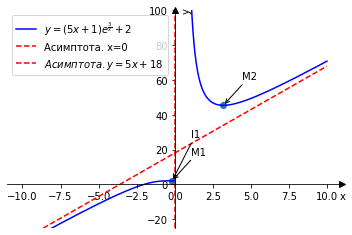

In [ ]:
def f(x):
  return((5 * x + 1) * sympy.E ** (3 / x) + 2)

picture = graph()

picture.set_function(f)
picture.analyze_function(-10, 10, -25, 100)

picture.normalize()